fully relaxed case and the semi-relaxed case.


In [1]:
# !pip install POT

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import ot

from matplotlib import font_manager as font_manager

## Generate data



In [3]:
m = 100
n = 400

np.random.seed(0)


def gen_func(m,start_angle=0,end_angle=2*np.pi,scale_param=1,n_sectors=4):
    theta = np.random.uniform(low=start_angle,high=end_angle,size=(m,1))
    radii = np.random.exponential(scale=scale_param,size=(8*m)) # over sample enough
    radii =  radii[radii>scale_param*np.log(2)][0:m] # reject those near the center and grab m
    x = radii[:,np.newaxis]*np.hstack((np.cos(theta),np.sin(theta)))
    mode_index = np.floor(n_sectors*(theta)/np.pi) # class label is sector
    return x, mode_index

offset = np.pi/2
xt,lt = gen_func(m,offset,offset+np.pi/4) # target is one quadrant
xs,ls = gen_func(n,offset-np.pi/2,offset+np.pi/2) # source is uniform angles on right half plan

mu,nu = np.ones((m,)) / m, np.ones((n,)) / n  # uniform distribution on samples

## Plot data



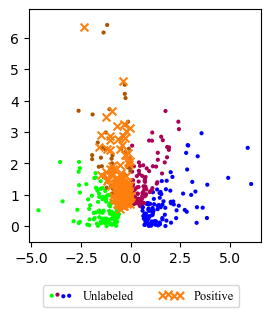

In [4]:

font_title = {'family': 'Times New Roman',
        'color':  'black',
        'weight': 'bold',
        'size': 9,
        }

font_legend = font_manager.FontProperties(family='Times New Roman',
                                   weight='normal',
                                   style='normal', size=9)


# plt.figure(1)
# fig, ax = plt.subplots(1,1, figsize=(3.0, 3.8))

# ax.scatter(xs[:, 0], xs[:, 1], c=ls, label='Unlabeled', marker='.', edgecolors='None', cmap = "brg")



ax.scatter(xt[:, 0], xt[:, 1], s =32, facecolor = "C1", label='Positive', marker='x'))

ax.set_xlim([np.minimum(np.min(xs[:,0]), np.min(xt[:,0])) - 0.5, np.maximum(np.max(xs[:,0]), np.max(xt[:,0])) + 0.5])
ax.set_ylim([np.minimum(np.min(xs[:,1]), np.min(xt[:,1])) - 0.5, np.maximum(np.max(xs[:,1]), np.max(xt[:,1])) + 0.5])
# ax.legend(loc=1, scatterpoints=4, prop=font_legend)
# ax.set_title('Positive and unlabeled distributions', fontdict=font_title)
ax.set_box_aspect(1)
fig.legend(ncol=2, scatterpoints=4, bbox_transform=fig.transFigure, loc='lower center',  bbox_to_anchor=(0.5, 0.001), fontsize=9, prop=font_legend)
plt.show()

fig.savefig('pu_learning_toy_data.pdf', dpi=500, bbox_inches = 'tight', format='pdf')
fig.savefig('pu_learning_toy_data.png', dpi=500, bbox_inches = 'tight', format='png')
fig.savefig('pu_learning_toy_data.svg', dpi=500, bbox_inches = 'tight', format='svg')

In [5]:
# cost matrix
M = ot.dist(xt, xs)
M /= M.max()

# Subset-Selection Optimal Transport

Assume we know true_k so find solution with this cardinality

In [13]:
true_k = np.sum(np.in1d(ls,np.unique(lt)))

c_true = n/true_k
T = ot.partial.partial_wasserstein(1/c_true*mu, nu, M, m=np.sum(1/(c_true+1e-15)*mu))
P = c_true*T

nu_star = np.sum(P,axis=0,keepdims=True).T

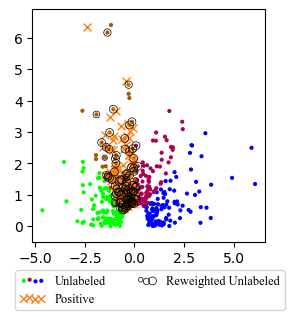

In [14]:
fig1, ax1 = plt.subplots(1,1,figsize=(3.0, 3.8))

ax1.scatter(xs[:, 0], xs[:, 1], c=ls, label='Unlabeled',marker='.', edgecolors='None', cmap = "brg")
ax1.scatter(xt[:, 0], xt[:, 1], c='C1',label='Positive', marker='x',s=32,linewidth=1)
ax1.scatter(xs[:, 0], xs[:, 1], edgecolors='k', label='Reweighted Unlabeled', s=32*nu_star/np.max(nu_star),facecolors='None',linewidth=0.5)

ax1.set_xlim([np.minimum(np.min(xs[:,0]), np.min(xt[:,0])) - 0.5, np.maximum(np.max(xs[:,0]), np.max(xt[:,0])) + 0.5])
ax1.set_ylim([np.minimum(np.min(xs[:,1]), np.min(xt[:,1])) - 0.5, np.maximum(np.max(xs[:,1]), np.max(xt[:,1])) + 0.5])

# plt.axis('equal')
# ax1.set_title(r'Semi-relaxed POT', fontdict=font_title)
ax1.set_box_aspect(1)
fig1.legend(ncol=2, scatterpoints=4, bbox_transform=fig.transFigure, loc='lower center',  bbox_to_anchor=(0.5, 0.001), fontsize=9, prop=font_legend)

fig.savefig('pu_learning_toy_data_sr_partial.pdf', dpi=500, bbox_inches = 'tight', format='pdf')
fig.savefig('pu_learning_toy_data_sr_partial.png', dpi=500, bbox_inches = 'tight', format='png')
fig.savefig('pu_learning_toy_data_sr_partial.svg', dpi=500, bbox_inches = 'tight', format='svg')

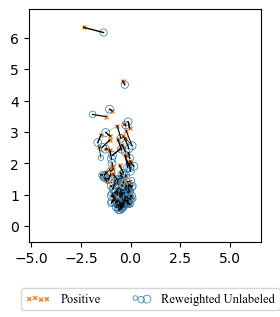

In [15]:
fig1, ax1 = plt.subplots(1, 1, figsize=(3.0, 3.8))
# ax1.scatter(xs[:, 0], xs[:, 1], c=ls, label='Source',marker='.', edgecolors='None')
# ax1.scatter(xt[:, 0], xt[:, 1], c='C1',label='Target', marker='x',s=32,linewidth=1)
ax1.scatter(xt[:, 0], xt[:, 1], c='C1',label='Positive', marker='x',s=8,linewidth=1),
""
for i in range(m):
    for j in range(n):
        if P[i,j]>0:
            ax1.plot(np.vstack((xt[i, 0], xs[j,0])), np.vstack((xt[i, 1], xs[j,1])), linewidth=P[i,j]*100, c='k')

ax1.scatter(xs[:, 0], xs[:, 1], edgecolors='C0', label='Reweighted Unlabeled', s=32*nu_star/np.max(nu_star),facecolors='None',linewidth=0.5)
# ax1.scatter(xt[:, 0], xt[:, 1], edgecolors='k', label='Reweighted Positive', s=32*mu_star/np.max(mu_star),facecolors='None',linewidth=0.5)

ax1.set_xlim([np.minimum(np.min(xs[:,0]), np.min(xt[:,0])) - 0.5, np.maximum(np.max(xs[:,0]), np.max(xt[:,0])) + 0.5])
ax1.set_ylim([np.minimum(np.min(xs[:,1]), np.min(xt[:,1])) - 0.5, np.maximum(np.max(xs[:,1]), np.max(xt[:,1])) + 0.5])

ax1.set_box_aspect(1)
fig1.legend(ncol=2, scatterpoints=4, bbox_transform=fig.transFigure, loc='lower center',  bbox_to_anchor=(0.5, 0.001), fontsize=9, prop=font_legend)

# plt.axis('equal')
# ax1.legend(scatterpoints=1)
# ax1.set_title(r'Semi-relaxed POT', fontdict=font_title)
fig1.savefig('pu_learning_toy_data_sr_partial1.pdf', dpi=500, bbox_inches = 'tight', format='pdf')
fig1.savefig('pu_learning_toy_data_sr_partial1.png', dpi=500, bbox_inches = 'tight', format='png')
fig1.savefig('pu_learning_toy_datas_sr_partial1.svg', dpi=500, bbox_inches = 'tight', format='svg')

# Partial Optimal Transport

In [19]:
T = ot.partial.partial_wasserstein(mu, nu, M, m=1/c_true)

P2 = c_true*T

nu2_star = np.sum(P2,axis=0,keepdims=True).T
mu_star = np.sum(P2,axis=1,keepdims=True)


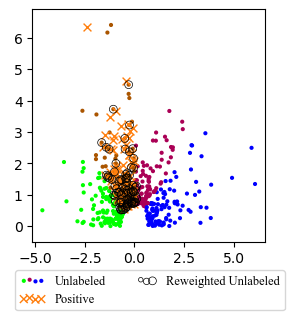

In [20]:
fig1, ax1 = plt.subplots(1, 1, figsize=(3.0, 3.8))
ax1.scatter(xs[:, 0], xs[:, 1], c=ls, label='Unlabeled',marker='.', edgecolors='None', cmap = "brg")
ax1.scatter(xt[:, 0], xt[:, 1], c='C1',label='Positive', marker='x',s=32,linewidth=1)
ax1.scatter(xs[:, 0], xs[:, 1], edgecolors='k', label='Reweighted Unlabeled', s=32*nu2_star/np.max(nu2_star),facecolors='None',linewidth=0.5)

ax1.set_xlim([np.minimum(np.min(xs[:,0]), np.min(xt[:,0])) - 0.5, np.maximum(np.max(xs[:,0]), np.max(xt[:,0])) + 0.5])
ax1.set_ylim([np.minimum(np.min(xs[:,1]), np.min(xt[:,1])) - 0.5, np.maximum(np.max(xs[:,1]), np.max(xt[:,1])) + 0.5])

# plt.axis('equal')
# ax1.set_title(r'Semi-relaxed POT', fontdict=font_title)
ax1.set_box_aspect(1)
fig1.legend(ncol=2, scatterpoints=4, bbox_transform=fig.transFigure, loc='lower center',  bbox_to_anchor=(0.5, 0.001), fontsize=9, prop=font_legend)

fig1.savefig('pu_learning_toy_data_fr_partial.pdf', dpi=500, bbox_inches = 'tight', format='pdf')
fig1.savefig('pu_learning_toy_data_fr_partial.png', dpi=500, bbox_inches = 'tight', format='png')
fig1.savefig('pu_learning_toy_datas_fr_partial.svg', dpi=500, bbox_inches = 'tight', format='svg')


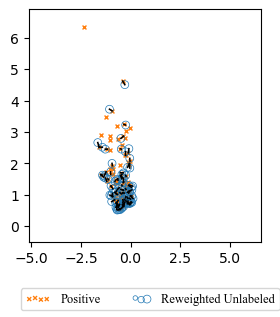

In [21]:
fig1, ax1 = plt.subplots(1, 1, figsize=(3.0, 3.8))
# ax1.scatter(xs[:, 0], xs[:, 1], c=ls, label='Source',marker='.', edgecolors='None')
# ax1.scatter(xt[:, 0], xt[:, 1], c='C1',label='Target', marker='x',s=32,linewidth=1)
ax1.scatter(xt[:, 0], xt[:, 1], c='C1',label='Positive', marker='x',s=8,linewidth=1),
""
for i in range(m):
    for j in range(n):
        if P2[i,j]>0:
            ax1.plot(np.vstack((xt[i, 0], xs[j,0])), np.vstack((xt[i, 1], xs[j,1])), linewidth=P2[i,j]*100, c='k')

ax1.scatter(xs[:, 0], xs[:, 1], edgecolors='C0', label='Reweighted Unlabeled', s=32*nu2_star/np.max(nu2_star),facecolors='None',linewidth=0.5)
# ax1.scatter(xt[:, 0], xt[:, 1], edgecolors='k', label='Reweighted Positive', s=32*mu_star/np.max(mu_star),facecolors='None',linewidth=0.5)

ax1.set_xlim([np.minimum(np.min(xs[:,0]), np.min(xt[:,0])) - 0.5, np.maximum(np.max(xs[:,0]), np.max(xt[:,0])) + 0.5])
ax1.set_ylim([np.minimum(np.min(xs[:,1]), np.min(xt[:,1])) - 0.5, np.maximum(np.max(xs[:,1]), np.max(xt[:,1])) + 0.5])

ax1.set_box_aspect(1)
fig1.legend(ncol=2, scatterpoints=4, bbox_transform=fig.transFigure, loc='lower center',  bbox_to_anchor=(0.5, 0.001), fontsize=9, prop=font_legend)

fig1.savefig('pu_learning_toy_data_fr_partial1.pdf', dpi=500, bbox_inches = 'tight', format='pdf')
fig1.savefig('pu_learning_toy_data_fr_partial1.png', dpi=500, bbox_inches = 'tight', format='png')
fig1.savefig('pu_learning_toy_datas_fr_partial1.svg', dpi=500, bbox_inches = 'tight', format='svg')


In [108]:
idx = np.argsort(nu_star.ravel())[::-1]
idx2 = np.argsort(nu2_star.ravel())[::-1]

precision_at_k = lambda idx: np.cumsum(np.in1d(ls[idx],np.unique(lt)))/np.arange(1,n+1)

print(precision_at_k(idx)[true_k])
print(precision_at_k(idx2)[true_k])



0.8409090909090909
0.7954545454545454


In [14]:
def sr_subset(mu,nu,xt,xs,true_k):
    n = len(xs)
    c_true = n/true_k
    M = ot.dist(xt, xs)
    M /= M.max()
    T = ot.partial.partial_wasserstein(1/c_true*mu, nu, M, m=np.sum(1/(c_true+1e-15)*mu))
    P = c_true*T
    nu_star = np.sum(P,axis=0,keepdims=True).T
    return nu_star


def fr_subset(mu,nu,xt,xs,true_k):
    n = len(xs)
    c_true = n/true_k
    M = ot.dist(xt, xs)
    M /= M.max()
    T = ot.partial.partial_wasserstein(mu, nu, M, m=1/c_true)
    P = c_true*T
    nu_star = np.sum(P,axis=0,keepdims=True).T
    return nu_star

In [15]:
def eval_given_k(lt,ls,nu_star,true_k):
    n = len(ls)
    idx = np.argsort(nu_star.ravel())[::-1]
    precision_at_k = lambda idx: np.cumsum(np.in1d(ls[idx],np.unique(lt)))/np.arange(1,n+1)
    return precision_at_k(idx)[true_k]


In [16]:
m = 100
nranges = np.linspace(100,800,16,dtype=int)
target_angle_starts = np.pi*np.array([-0.25,0,1/4,1/2-1/8])

offset = 0
def gen_func(m,start_angle=0,end_angle=2*np.pi,scale_param=1,n_sectors=4):
    theta = np.random.uniform(low=start_angle,high=end_angle,size=(m,1))
    radii = np.random.exponential(scale=scale_param,size=(8*m)) # over sample enough
    radii =  radii[radii>scale_param*np.log(2)][0:m] # reject those near the center and grab m
    x = radii[:,np.newaxis]*np.hstack((np.cos(theta),np.sin(theta)))
    mode_index = np.floor(n_sectors*(theta)/np.pi) # class label is sector
    return x, mode_index

nmonte = 100

acc1 = np.zeros((len(nranges), nmonte,len(target_angle_starts)))
acc2 = np.zeros((len(nranges), nmonte,len(target_angle_starts)))

for i,n in enumerate(nranges):
    for j,angle_start in enumerate(target_angle_starts):
        for monte_seed in range(nmonte):
            np.random.seed(monte_seed)

            xt,lt = gen_func(m,offset+angle_start,offset+np.pi/2) # target is one quadrant
            xs,ls = gen_func(n,offset-np.pi/2,offset+np.pi/2) # source is uniform angles on right half plan
            mu,nu = np.ones((m,)) / m, np.ones((n,)) / n  # uniform distribution on samples

            true_k = np.sum(np.in1d(ls,np.unique(lt)))
            acc1[i,monte_seed,j] = eval_given_k(lt,ls,sr_subset(mu,nu,xt,xs,true_k),true_k)
            acc2[i,monte_seed,j] = eval_given_k(lt,ls,fr_subset(mu,nu,xt,xs,true_k),true_k)




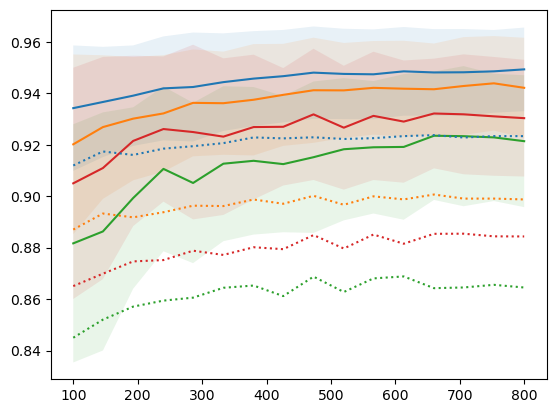

In [17]:
plt.plot(nranges,np.mean(acc1,axis=1),'-')
plt.gca().set_prop_cycle(None)
plt.plot(nranges,np.mean(acc2,axis=1),':')
plt.gca().set_prop_cycle(None)
for j,_ in enumerate(target_angle_starts):
    plt.fill_between(nranges,np.mean(acc1,axis=1)[:,j]+np.std(acc1,axis=1)[:,j],np.mean(acc1,axis=1)[:,j]-np.std(acc1,axis=1)[:,j],alpha=0.1)


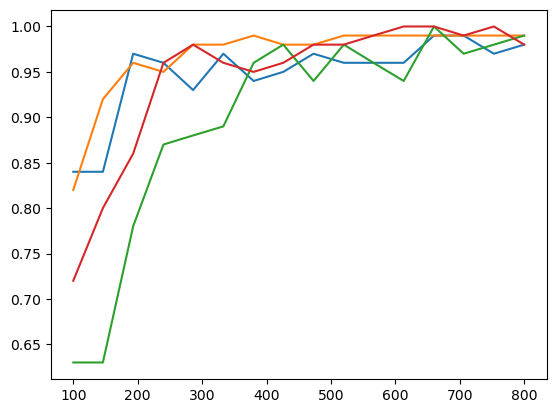

In [18]:
plt.plot(nranges,np.mean(acc1>acc2,axis=1),'-')